<a href="https://colab.research.google.com/github/rogeliovc/Analisis-de-datos/blob/main/Analisis_de_datos-Convex_hull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install anndata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 2.7 MB/s eta 0:00:00


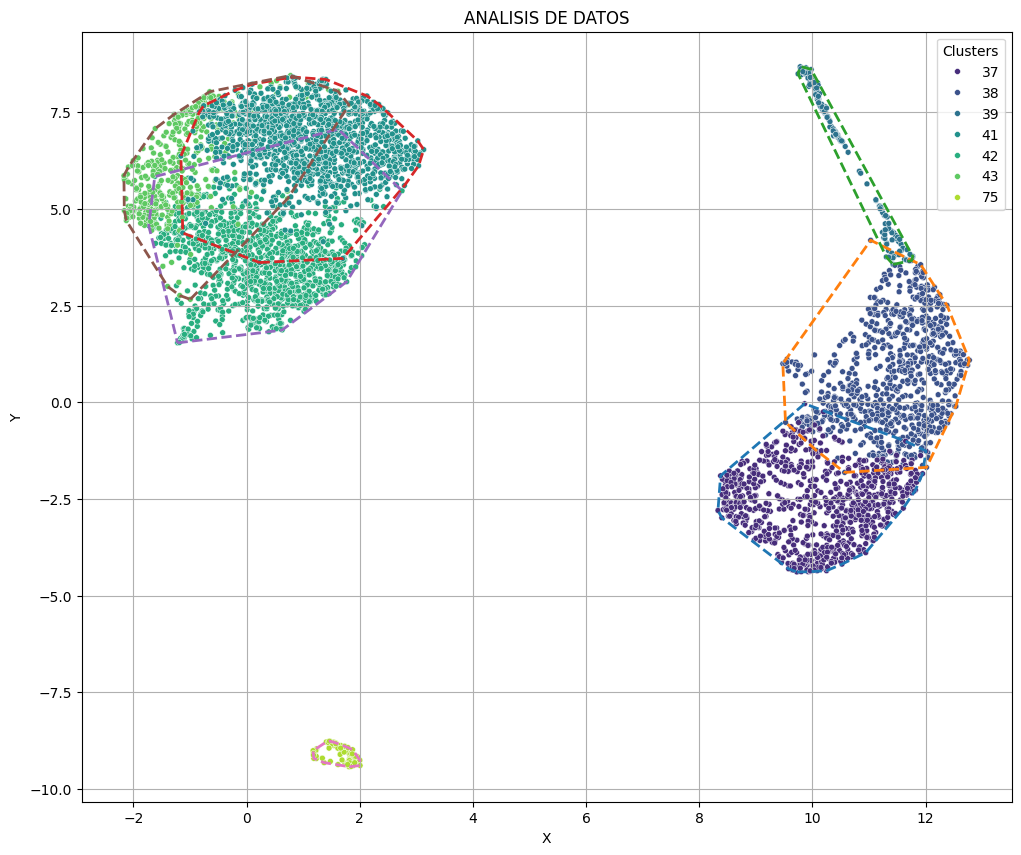

In [3]:
import anndata as ad
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

# Implementación de Graham Scan
def graham_scan(points):
    def angle_from_point(p0, p1):
        return math.atan2(p1[1] - p0[1], p1[0] - p0[0])

    def cross(o, a, b):
        return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])

    # Encuentra el punto con la menor coordenada y, y en caso de empate, el de menor x
    pivot = min(points, key=lambda p: (p[1], p[0]))

    # Ordena los puntos por el ángulo polar respecto al punto pivot
    sorted_points = sorted(points, key=lambda p: (angle_from_point(pivot, p), -p[1], p[0]))

    # Construye convex hull
    hull = []
    for point in sorted_points:
        while len(hull) >= 2 and cross(hull[-2], hull[-1], point) <= 0:
            hull.pop()
        hull.append(point)

    return np.array(hull)

# Ubica y carga el dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/analisis de datos/data.h5ad'
adata = ad.read_h5ad(file_path)

umap_cor = adata.obsm['X_UMAP']
cluster_id = adata.obs['cluster_id']

# Graficar los datos
plt.figure(figsize=(12, 10))
sns.scatterplot(x=umap_cor[:, 0], y=umap_cor[:, 1], hue=cluster_id, palette='viridis', legend='full',s=18)

# Aplicar convex hull para cada clúster
for cluster in np.unique(cluster_id):
    # Seleccionar los puntos correspondientes a este clúster
    cluster_points = umap_cor[cluster_id == cluster]

    # Calcular convex hull para este clúster
    if len(cluster_points) > 2:  # El convex hull solo tiene sentido si hay más de 2 puntos
        hull = graham_scan(cluster_points)

        # Añadir convex hull al gráfico
        if len(hull) > 0:
            hull = np.append(hull, [hull[0]], axis=0)  # Cerrar el polígono
            plt.plot(hull[:, 0], hull[:, 1], '--', lw=2)  # Línea de convex hull

plt.title('ANALISIS DE DATOS')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(title='Clusters')
plt.grid(True)
plt.show()